In [1]:
import pandas as pd
import re
import numpy as np
import string
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.sparse import hstack
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
# from pycaret.classification import setup, compare_models, predict_model
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
# from pycaret.classification import *
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Run this cell if you want to continue with experiment 3.2
data = pd.read_csv("/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/GEMET_UNESCO_Data_All_Included_Non-translated_and_Translated.csv")

In [4]:
data

,Unnamed: 0,dataset,title,keywords,description,theme,combined,Detected Language,Translated
0,0,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Population in group establishments by Province...,"size of the municipality, Structure and situat...",Table of INEBase\nPopulation in group establis...,SOCI,Population in group establishments by Province...,en,Population in group establishments by Province...
1,1,http://data.europa.eu/88u/dataset/jrc-odin-192...,Small punch tensile/fracture test data for P91...,Elevated temperature material properties,Open access small punch data created by the Eu...,TECH,Small punch tensile/fracture test data for P91...,en,Small punch tensile/fracture test data for P91...
2,2,http://data.europa.eu/88u/dataset/s623_217,Flash Eurobarometer 217: Intercultural dialogu...,"surveys, polls, opinion, intercultural, flash,...","To assess on the preparation, effectiveness an...",GOVE,Flash Eurobarometer 217: Intercultural dialogu...,en,Flash Eurobarometer 217: Intercultural dialogu...
3,3,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Actividades de educación no formal realizadas ...,Survey on Adult Population Involvement in Lear...,Table of INEBase\nActividades de educación no ...,ECON,Actividades de educación no formal realizadas ...,es,Non -formal education activities carried out f...
4,4,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Criminal offences charged against the person c...,"UE27_2020 without Spain, Statistics on Domesti...",Table of INEBase\nCriminal offences charged ag...,SOCI,Criminal offences charged against the person c...,en,Criminal offences charged against the person c...
...,...,...,...,...,...,...,...,...,...
40872,40872,traffic noise traffic noise control traffic on...,traffic noise traffic noise control traffic on...,traffic noise traffic noise control traffic on...,traffic noise traffic noise control traffic on...,TRAN,traffic noise traffic noise control traffic on...,NaN,traffic noise traffic noise control traffic on...
40873,40873,tunnel tween-deck tanker twin-hull craft under...,tunnel tween-deck tanker twin-hull craft under...,tunnel tween-deck tanker twin-hull craft under...,tunnel tween-deck tanker twin-hull craft under...,TRAN,tunnel tween-deck tanker twin-hull craft under...,NaN,tunnel tween-deck tanker twin-hull craft under...
40874,40874,Carpentry Chemical technology Cloning Containe...,Carpentry Chemical technology Cloning Containe...,Carpentry Chemical technology Cloning Containe...,Carpentry Chemical technology Cloning Containe...,TRAN,Carpentry Chemical technology Cloning Containe...,NaN,Carpentry Chemical technology Cloning Containe...
40875,40875,Marine engineering Materials engineering Mater...,Marine engineering Materials engineering Mater...,Marine engineering Materials engineering Mater...,Marine engineering Materials engineering Mater...,TRAN,Marine engineering Materials engineering Mater...,NaN,Marine engineering Materials engineering Mater...


In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
data.columns

Index(['dataset', 'title', 'keywords', 'description', 'theme', 'combined',
       'Detected Language', 'Translated'],
      dtype='object')

In [ ]:
encoded_data = pd.get_dummies(data, columns=['theme'])

In [ ]:
encoded_data

,dataset,title,keywords,description,combined,Detected Language,Translated,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Population in group establishments by Province...,"size of the municipality, Structure and situat...",Table of INEBase\nPopulation in group establis...,Population in group establishments by Province...,en,Population in group establishments by Province...,0,0,0,0,0,0,0,0,0,0,1,0,0
1,http://data.europa.eu/88u/dataset/jrc-odin-192...,Small punch tensile/fracture test data for P91...,Elevated temperature material properties,Open access small punch data created by the Eu...,Small punch tensile/fracture test data for P91...,en,Small punch tensile/fracture test data for P91...,0,0,0,0,0,0,0,0,0,0,0,1,0
2,http://data.europa.eu/88u/dataset/s623_217,Flash Eurobarometer 217: Intercultural dialogu...,"surveys, polls, opinion, intercultural, flash,...","To assess on the preparation, effectiveness an...",Flash Eurobarometer 217: Intercultural dialogu...,en,Flash Eurobarometer 217: Intercultural dialogu...,0,0,0,0,0,1,0,0,0,0,0,0,0
3,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Actividades de educación no formal realizadas ...,Survey on Adult Population Involvement in Lear...,Table of INEBase\nActividades de educación no ...,Actividades de educación no formal realizadas ...,es,Non -formal education activities carried out f...,0,1,0,0,0,0,0,0,0,0,0,0,0
4,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Criminal offences charged against the person c...,"UE27_2020 without Spain, Statistics on Domesti...",Table of INEBase\nCriminal offences charged ag...,Criminal offences charged against the person c...,en,Criminal offences charged against the person c...,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40872,traffic noise traffic noise control traffic on...,traffic noise traffic noise control traffic on...,traffic noise traffic noise control traffic on...,traffic noise traffic noise control traffic on...,traffic noise traffic noise control traffic on...,NaN,traffic noise traffic noise control traffic on...,0,0,0,0,0,0,0,0,0,0,0,0,1
40873,tunnel tween-deck tanker twin-hull craft under...,tunnel tween-deck tanker twin-hull craft under...,tunnel tween-deck tanker twin-hull craft under...,tunnel tween-deck tanker twin-hull craft under...,tunnel tween-deck tanker twin-hull craft under...,NaN,tunnel tween-deck tanker twin-hull craft under...,0,0,0,0,0,0,0,0,0,0,0,0,1
40874,Carpentry Chemical technology Cloning Containe...,Carpentry Chemical technology Cloning Containe...,Carpentry Chemical technology Cloning Containe...,Carpentry Chemical technology Cloning Containe...,Carpentry Chemical technology Cloning Containe...,NaN,Carpentry Chemical technology Cloning Containe...,0,0,0,0,0,0,0,0,0,0,0,0,1
40875,Marine engineering Materials engineering Mater...,Marine engineering Materials engineering Mater...,Marine engineering Materials engineering Mater...,Marine engineering Materials engineering Mater...,Marine engineering Materials engineering Mater...,NaN,Marine engineering Materials engineering Mater...,0,0,0,0,0,0,0,0,0,0,0,0,1


#### 4.1. GEMET +UNESCO Thesauri with Tailored (Non Translated data)

In [ ]:
encoded_data=encoded_data.groupby(['dataset', 'title', 'keywords', 'description', 'combined', 'Translated']).sum().reset_index()

<ipython-input-129-76b1aae063df>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  encoded_data=encoded_data.groupby(['dataset', 'title', 'keywords', 'description', 'combined', 'Translated']).sum().reset_index()


In [ ]:
#remove the unwanted coloumns 
data=encoded_data.drop(['dataset', 'title', 'keywords', 'description', 'Translated'], axis=1)

In [ ]:
data

,combined,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,Ability Achievement motivation Aptitude Attitu...,0,0,0,0,0,0,0,1,0,0,1,0,0
1,Accounting Balance of payments Balance of trad...,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Administrative tribunals Arbitration Artistic ...,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Africa alignment alluvial plain altitude Ameri...,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Afrikaans Albanian Altaic languages Amerindian...,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30476,winter sports resort wood woodland ecosystem w...,0,0,0,0,0,0,0,0,0,1,0,0,0
30477,working population engaged in agriculture work...,0,0,1,0,0,0,0,0,0,0,0,0,0
30478,working population engaged in agriculture work...,0,0,0,0,0,0,0,1,0,0,0,0,0
30479,working population engaged in agriculture work...,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
#load the tailored preprocessing stop word list
tailored_stop_words=pd.read_csv("/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/from_enchant_tailored_stop_words.csv")
tailored_stop_words=tailored_stop_words.columns.to_list()
tailored_stop_words = [w.lower() for w in tailored_stop_words]

In [6]:
len(tailored_stop_words)

18633

In [ ]:
# Text preprocessing function
import nltk
import string
from nltk.corpus import words
from nltk.tokenize import word_tokenize, wordpunct_tokenize # for our dataset wordpunct is suitable because it also splits on punction marks 
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
alphabets_months_years_units = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december', 'al', 'ad', 'at', 'by', 'be', 'ba', 'bg', 'hr', 'cy', 'cz', 'dk', 'ee', 'fo', 'fi', 'fr', 'de', 'gi', 'gr', 'hu', 'is', 'ie', 'it', 'lv', 'li', 'lt', 'lu', 'mk', 'mt', 'md', 'mc', 'me', 'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sm', 'rs', 'sk', 'si', 'es', 'se', 'ch', 'ua', 'gb', 'va', 'nm', 'μm', 'mm', 'cm', 'km', 'm', 'g', 'mg', 'kg', 'mol', 'mL', 'μL', 'nL', 'pL', 'fL', 'Hz', 'kHz', 'MHz', 'GHz', 'THz', 'Pa', 'kPa', 'MPa', 'GPa', 'Torr', 'atm', 'N', 'kN', 'dyn', 'J', 'kJ', 'W', 'kW', 'MW', 'GW', 'eV', 'keV', 'MeV', 'GeV', 'T', 'mT', 'μT', 'G', 'mG', 'μG', 'J/m^3', 'J/kg', 'J/mol', 'C', 'V', 'mV', 'kV', 'μV', 'A', 'mA', 'kA', 'mol/s', 'W/m^2', 'W/(m^2.K)', 'J/m^2', 'J/(m^2.K)', 'N/m^2', 'N/(m^2.K)', 'S', 'S/m', 'Wb', 'T', 'Hz/m', 'F', 'H', 'lm', 'lx', 'Bq', 'Gy', 'Sv', 'kat', 'μkat', 'pmol/s', 'â']

def preprocess_text(text):

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)

    tokens = wordpunct_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]


    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    
    # filter out stop words
    words = [w for w in words if not w in stop_words]
  
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(token) for token in words]

    # remove tailored stop words
    words = [word for word in words if word not in tailored_stop_words]

    #Tailored preprocessing(removing non-english words, years, months, countries, thier abbreviations, scientific units, alphabets, etc.)
    words=  [word for word in words if word not in alphabets_months_years_units]

    return " ".join(words)
# Now proceed with the rest of the steps (train-test split, tokenization, etc.) as shown in the previous code example.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
preprocess_text("language  mm p r c zx zypern zzp zã zãºjar â âµg jrc âµm âµmol âµs âºc ãºltimo ãºtil problem significance")

'language problem significance'

In [ ]:
print("Not Processed:  ", data['combined'][1])
print("Processed:  ", preprocess_text(data['combined'][1]))

Not Processed:   Accounting Balance of payments Balance of trade Banks Barter Branding Budget contributions Budgetary control Budgets Capital Capital flow Commodity agreements Consumer protection Consumers Cost accounting Cost effectiveness Cost reduction Costs Credit Currencies
Processed:   accounting balance payment balance trade bank barter branding budget contribution budgetary control budget capital capital flow commodity agreement consumer protection consumer cost accounting cost effectiveness cost reduction cost credit currency


example running for tailored preprocessing

In [ ]:
print("Not Processed:  ", data['combined'][2])
print("Processed:  ", preprocess_text(data['combined'][2]))

Not Processed:   Administrative tribunals Arbitration Artistic property Bilateral agreements Boundaries Civil law Commercial law Comparative law Computer law Consensus Constitutional history Constitutional law Constitutions Contract law Copyright Copyright transfer Courts Crime prevention Criminal law Customary law
Processed:   administrative tribunal arbitration artistic property bilateral agreement boundary civil law commercial law comparative law computer law consensus constitutional history constitutional law constitution contract law copyright copyright transfer court crime prevention criminal law customary law


In [ ]:
# Applying the preprocessing to whole dataset
# Preprocess the 'combined' column
data["Preprocessed_combined"] = data["combined"].apply(preprocess_text)
# Now proceed with the rest of the steps (train-test split, tokenization, etc.) as shown in the previous code example.

In [ ]:
data[["combined","Preprocessed_combined"]]

,combined,Preprocessed_combined
0,Ability Achievement motivation Aptitude Attitu...,ability achievement motivation aptitude attitu...
1,Accounting Balance of payments Balance of trad...,accounting balance payment balance trade bank ...
2,Administrative tribunals Arbitration Artistic ...,administrative tribunal arbitration artistic p...
3,Africa alignment alluvial plain altitude Ameri...,alignment alluvial plain altitude anaerobic la...
4,Afrikaans Albanian Altaic languages Amerindian...,language language language oceanic language la...
...,...,...
30476,winter sports resort wood woodland ecosystem w...,winter sport resort wood woodland ecosystem wo...
30477,working population engaged in agriculture work...,working population engaged agriculture workpla...
30478,working population engaged in agriculture work...,working population engaged agriculture workpla...
30479,working population engaged in agriculture work...,working population engaged agriculture workpla...


In [ ]:
# Prepare your feature matrix (X) and target vector (y)
X = data["Preprocessed_combined"]
y = data[['theme_AGRI', 'theme_ECON', 'theme_EDUC', 'theme_ENER','theme_ENVI', 'theme_GOVE', 'theme_HEAL', 'theme_INTR', 'theme_JUST','theme_REGI', 'theme_SOCI', 'theme_TECH', 'theme_TRAN']]

In [ ]:
# split the data using the train test split function the split ratio can be differen
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
training_set_shape=(len(X_train), len(X_test))
training_set_shape

(21336, 9145)

In [ ]:
testing_set_shape=(len(y_train), len(y_test))
testing_set_shape

(21336, 9145)

##### 4.1.1 - Machine Learning Models with **UNI-Gram** features
    1- K-Nearest Neighbors
    2- Logistic regression
    3- XGBoost
    4- SVM
    5- Random Forest

In [ ]:
train_vectorizer = TfidfVectorizer(ngram_range=(1,1))
X_train = train_vectorizer.fit_transform(X_train)
X_test = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
Uni_gram_features = pd.DataFrame.sparse.from_spmatrix(X_train)
Uni_gram_features.columns = train_vectorizer.get_feature_names_out()

In [ ]:
len(Uni_gram_features.columns.to_list())

17371

In [ ]:
print(Uni_gram_features.sum().sort_values(ascending=False).head(100))

year            977.406151
population      760.623137
sex             717.245267
education       701.704058
labour          657.071802
                   ...    
social          144.492632
active          143.789422
technology      140.798429
based           138.231550
construction    137.836077
Length: 100, dtype: float64


<Axes: title={'center': 'Top 20 Unigrams in Preprocessed_combined'}>

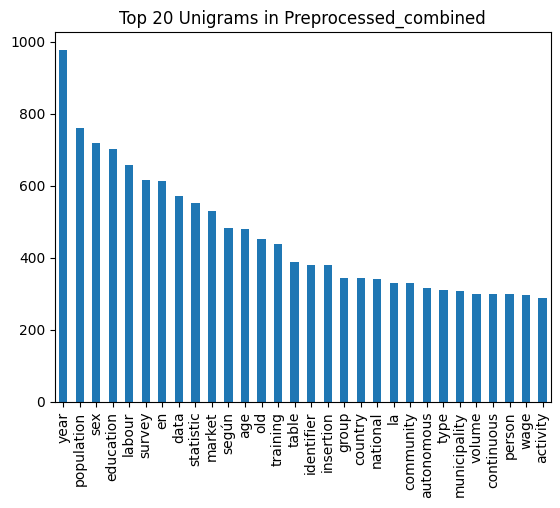

In [ ]:
Uni_gram_features.sum().sort_values(ascending=False).head(30).plot(kind='bar', title='Top 20 Unigrams in Preprocessed_combined')

In [ ]:
unigram_Accuracy=[]

*with* multioutput classifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': MultiOutputClassifier(LogisticRegression()),
    'SVM': MultiOutputClassifier(LinearSVC()),
    'MNB': MultiOutputClassifier(MultinomialNB()),
    # 'XGBoost': MultiOutputClassifier(XGBClassifier()),
    # 'Random Forest': MultiOutputClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 87.1514%
              precision    recall  f1-score   support

           0       0.43      0.94      0.59        53
           1       0.92      0.99      0.95      2186
           2       0.91      1.00      0.95      1044
           3       0.69      0.99      0.81       178
           4       0.90      0.95      0.93      1671
           5       0.79      0.97      0.87       703
           6       0.83      0.98      0.90       597
           7       0.61      1.00      0.76        97
           8       0.77      1.00      0.87       164
           9       0.88      0.99      0.93       694
          10       0.94      0.99      0.96      2284
          11       0.84      0.97      0.90      1255
          12       0.43      0.93      0.59        42

   micro avg       0.88      0.98      0.92     10968
   macro avg       0.77      0.98      0.85     10968
weighted avg       0.88      0.98      0.93     10968
 samples avg       0.89      0.90      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 91.5254%
              precision    recall  f1-score   support

           0       0.65      0.85      0.74        89
           1       0.95      0.99      0.97      2256
           2       0.95      1.00      0.97      1095
           3       0.85      0.98      0.91       224
           4       0.93      0.96      0.94      1716
           5       0.87      0.96      0.91       784
           6       0.90      0.98      0.94       648
           7       0.69      0.96      0.80       113
           8       0.88      0.97      0.93       192
           9       0.90      0.98      0.94       715
          10       0.97      0.99      0.98      2350
          11       0.91      0.96      0.93      1371
          12       0.72      0.89      0.80        73

   micro avg       0.92      0.98      0.95     11626
   macro avg       0.86      0.96      0.90     11626
weighted avg       0.93      0.98      0.95     11626
 samples avg       0.94      0.94      0.94     11626





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.17      0.74      0.28        27
           1       0.88      0.96      0.92      2128
           2       0.83      0.96      0.89       995
           3       0.65      0.95      0.77       176
           4       0.91      0.86      0.88      1874
           5       0.71      0.92      0.80       663
           6       0.73      0.97      0.83       535
           7       0.60      0.92      0.73       103
           8       0.41      0.90      0.56        97
           9       0.77      0.98      0.86       618
          10       0.91      0.95      0.93      2304
          11       0.80      0.90      0.85      1282
          12       0.00      0.00      0.00         7

   micro avg       0.82      0.93      0.87     10809
   macro avg       0.64      0.85      0.72     10809
weighted avg       0.84      0.93      0.88     10809
 samples avg       0.83      0.83      0.82     10809





With OneVsRestClassifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': OneVsRestClassifier(LogisticRegression()),
    'SVM': OneVsRestClassifier(LinearSVC()),
    'MNB': OneVsRestClassifier(MultinomialNB()),
   # 'XGBoost': OneVsRestClassifier(XGBClassifier()),
    #'Random Forest': OneVsRestClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 87.1514%
              precision    recall  f1-score   support

           0       0.43      0.94      0.59        53
           1       0.92      0.99      0.95      2186
           2       0.91      1.00      0.95      1044
           3       0.69      0.99      0.81       178
           4       0.90      0.95      0.93      1671
           5       0.79      0.97      0.87       703
           6       0.83      0.98      0.90       597
           7       0.61      1.00      0.76        97
           8       0.77      1.00      0.87       164
           9       0.88      0.99      0.93       694
          10       0.94      0.99      0.96      2284
          11       0.84      0.97      0.90      1255
          12       0.43      0.93      0.59        42

   micro avg       0.88      0.98      0.92     10968
   macro avg       0.77      0.98      0.85     10968
weighted avg       0.88      0.98      0.93     10968
 samples avg       0.89      0.90      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 91.5254%
              precision    recall  f1-score   support

           0       0.65      0.85      0.74        89
           1       0.95      0.99      0.97      2256
           2       0.95      1.00      0.97      1095
           3       0.85      0.98      0.91       224
           4       0.93      0.96      0.94      1716
           5       0.87      0.96      0.91       784
           6       0.90      0.98      0.94       648
           7       0.69      0.96      0.80       113
           8       0.88      0.97      0.93       192
           9       0.90      0.98      0.94       715
          10       0.97      0.99      0.98      2350
          11       0.91      0.96      0.93      1371
          12       0.72      0.89      0.80        73

   micro avg       0.92      0.98      0.95     11626
   macro avg       0.86      0.96      0.90     11626
weighted avg       0.93      0.98      0.95     11626
 samples avg       0.94      0.94      0.94     11626





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 77.3756%
              precision    recall  f1-score   support

           0       0.17      0.74      0.28        27
           1       0.88      0.96      0.92      2128
           2       0.83      0.96      0.89       995
           3       0.65      0.95      0.77       176
           4       0.91      0.86      0.88      1874
           5       0.71      0.92      0.80       663
           6       0.73      0.97      0.83       535
           7       0.60      0.92      0.73       103
           8       0.41      0.90      0.56        97
           9       0.77      0.98      0.86       618
          10       0.91      0.95      0.93      2304
          11       0.80      0.90      0.85      1282
          12       0.00      0.00      0.00         7

   micro avg       0.82      0.93      0.87     10809
   macro avg       0.64      0.85      0.72     10809
weighted avg       0.84      0.93      0.88     10809
 samples avg       0.83      0.83      0.82     10809





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 4.1.2 Machine Learning Models with Uni+Bigrams

In [ ]:
uni_bigram_Accuracy=[]

In [ ]:
# split the data using the train test split function the split ratio can be differen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
train_vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train = train_vectorizer.fit_transform(X_train)
X_test = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
Uni_Bi_gram_features = pd.DataFrame.sparse.from_spmatrix(X_train)
Uni_Bi_gram_features.columns = train_vectorizer.get_feature_names_out()

In [ ]:
len(Uni_Bi_gram_features.columns.to_list())

222559

with multioutput classifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': MultiOutputClassifier(LogisticRegression()),
    'SVM': MultiOutputClassifier(LinearSVC()),
    'MNB': MultiOutputClassifier(MultinomialNB()),
   # 'XGBoost': MultiOutputClassifier(XGBClassifier()),
   # 'Random Forest': MultiOutputClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 82.4822%
              precision    recall  f1-score   support

           0       0.23      0.93      0.37        29
           1       0.91      0.97      0.94      2182
           2       0.88      0.99      0.93      1015
           3       0.68      0.99      0.81       177
           4       0.90      0.93      0.91      1708
           5       0.74      0.95      0.83       671
           6       0.79      0.98      0.87       567
           7       0.59      1.00      0.74        93
           8       0.62      0.99      0.77       133
           9       0.83      0.99      0.90       655
          10       0.93      0.94      0.93      2358
          11       0.84      0.93      0.88      1298
          12       0.39      0.92      0.55        38

   micro avg       0.85      0.96      0.90     10924
   macro avg       0.72      0.96      0.80     10924
weighted avg       0.87      0.96      0.91     10924
 samples avg       0.87      0.88      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 87.2061%
              precision    recall  f1-score   support

           0       0.62      0.88      0.73        83
           1       0.95      0.97      0.96      2287
           2       0.94      0.99      0.96      1099
           3       0.84      0.95      0.89       227
           4       0.93      0.94      0.93      1752
           5       0.86      0.94      0.90       785
           6       0.88      0.96      0.92       642
           7       0.66      0.99      0.79       105
           8       0.86      0.96      0.91       191
           9       0.87      0.98      0.92       694
          10       0.94      0.93      0.94      2417
          11       0.91      0.94      0.92      1393
          12       0.72      0.84      0.78        77

   micro avg       0.91      0.95      0.93     11752
   macro avg       0.84      0.94      0.89     11752
weighted avg       0.91      0.95      0.93     11752
 samples avg       0.93      0.92      0.92     11752





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 52.4221%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.73      0.98      0.84      1736
           2       0.80      1.00      0.89       920
           3       0.53      1.00      0.69       137
           4       0.70      0.98      0.82      1270
           5       0.34      1.00      0.51       292
           6       0.20      0.99      0.33       144
           7       0.02      1.00      0.04         3
           8       0.00      0.00      0.00         0
           9       0.31      1.00      0.47       240
          10       0.71      1.00      0.83      1713
          11       0.44      1.00      0.61       628
          12       0.00      0.00      0.00         0

   micro avg       0.57      0.99      0.73      7083
   macro avg       0.37      0.77      0.46      7083
weighted avg       0.66      0.99      0.78      7083
 samples avg       0.56      0.61      0.58      7083





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


with OneVsRestClassifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': OneVsRestClassifier(LogisticRegression()),
    'SVM': OneVsRestClassifier(LinearSVC()),
    'MNB': OneVsRestClassifier(MultinomialNB()),
   # 'XGBoost': OneVsRestClassifier(XGBClassifier()),
    #'Random Forest': OneVsRestClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 82.4822%
              precision    recall  f1-score   support

           0       0.23      0.93      0.37        29
           1       0.91      0.97      0.94      2182
           2       0.88      0.99      0.93      1015
           3       0.68      0.99      0.81       177
           4       0.90      0.93      0.91      1708
           5       0.74      0.95      0.83       671
           6       0.79      0.98      0.87       567
           7       0.59      1.00      0.74        93
           8       0.62      0.99      0.77       133
           9       0.83      0.99      0.90       655
          10       0.93      0.94      0.93      2358
          11       0.84      0.93      0.88      1298
          12       0.39      0.92      0.55        38

   micro avg       0.85      0.96      0.90     10924
   macro avg       0.72      0.96      0.80     10924
weighted avg       0.87      0.96      0.91     10924
 samples avg       0.87      0.88      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 87.2061%
              precision    recall  f1-score   support

           0       0.62      0.88      0.73        83
           1       0.95      0.97      0.96      2287
           2       0.94      0.99      0.96      1099
           3       0.84      0.95      0.89       227
           4       0.93      0.94      0.93      1752
           5       0.86      0.94      0.90       785
           6       0.88      0.96      0.92       642
           7       0.66      0.99      0.79       105
           8       0.86      0.96      0.91       191
           9       0.87      0.98      0.92       694
          10       0.94      0.93      0.94      2417
          11       0.91      0.94      0.92      1393
          12       0.72      0.84      0.78        77

   micro avg       0.91      0.95      0.93     11752
   macro avg       0.84      0.94      0.89     11752
weighted avg       0.91      0.95      0.93     11752
 samples avg       0.93      0.92      0.92     11752





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 52.4221%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.73      0.98      0.84      1736
           2       0.80      1.00      0.89       920
           3       0.53      1.00      0.69       137
           4       0.70      0.98      0.82      1270
           5       0.34      1.00      0.51       292
           6       0.20      0.99      0.33       144
           7       0.02      1.00      0.04         3
           8       0.00      0.00      0.00         0
           9       0.31      1.00      0.47       240
          10       0.71      1.00      0.83      1713
          11       0.44      1.00      0.61       628
          12       0.00      0.00      0.00         0

   micro avg       0.57      0.99      0.73      7083
   macro avg       0.37      0.77      0.46      7083
weighted avg       0.66      0.99      0.78      7083
 samples avg       0.56      0.61      0.58      7083





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 4.1.3 Machine Learning Models with Uni+Bi+Trigrams

In [ ]:
uni_bi_trigram_Accuracy=[]

In [ ]:
# split the data using the train test split function the split ratio can be differen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
train_vectorizer = TfidfVectorizer(ngram_range=(1,3))
X_train = train_vectorizer.fit_transform(X_train)
X_test = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
Uni_Bi_gram_features = pd.DataFrame.sparse.from_spmatrix(X_train)
Uni_Bi_gram_features.columns = train_vectorizer.get_feature_names_out()

In [ ]:
len(Uni_Bi_gram_features.columns.to_list())

529092

with multioutput classifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': MultiOutputClassifier(LogisticRegression()),
    'SVM': MultiOutputClassifier(LinearSVC()),
    'MNB': MultiOutputClassifier(MultinomialNB()),
  #  'XGBoost': MultiOutputClassifier(XGBClassifier()),
  #  'Random Forest': MultiOutputClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 79.0924%
              precision    recall  f1-score   support

           0       0.18      0.95      0.30        22
           1       0.91      0.96      0.93      2216
           2       0.87      0.99      0.93      1006
           3       0.67      0.99      0.80       176
           4       0.90      0.90      0.90      1775
           5       0.73      0.95      0.82       660
           6       0.78      0.98      0.87       557
           7       0.59      1.00      0.74        93
           8       0.59      1.00      0.74       125
           9       0.83      0.98      0.90       657
          10       0.91      0.89      0.90      2450
          11       0.82      0.91      0.87      1297
          12       0.33      0.94      0.49        32

   micro avg       0.84      0.93      0.89     11066
   macro avg       0.70      0.96      0.78     11066
weighted avg       0.86      0.93      0.89     11066
 samples avg       0.86      0.86      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 82.0120%
              precision    recall  f1-score   support

           0       0.61      0.87      0.71        82
           1       0.95      0.94      0.95      2369
           2       0.95      0.96      0.95      1131
           3       0.84      0.85      0.85       255
           4       0.93      0.92      0.93      1790
           5       0.86      0.93      0.89       800
           6       0.88      0.94      0.91       656
           7       0.65      1.00      0.79       103
           8       0.86      0.95      0.90       192
           9       0.87      0.96      0.92       705
          10       0.94      0.84      0.89      2666
          11       0.91      0.90      0.90      1443
          12       0.72      0.75      0.73        87

   micro avg       0.91      0.91      0.91     12279
   macro avg       0.84      0.91      0.87     12279
weighted avg       0.92      0.91      0.91     12279
 samples avg       0.93      0.90      0.90     12279





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 46.4735%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.69      0.99      0.81      1621
           2       0.80      1.00      0.89       916
           3       0.46      1.00      0.63       119
           4       0.63      0.99      0.77      1123
           5       0.27      1.00      0.43       234
           6       0.13      0.99      0.24        95
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.26      1.00      0.41       204
          10       0.65      1.00      0.79      1565
          11       0.36      1.00      0.53       523
          12       0.00      0.00      0.00         0

   micro avg       0.52      0.99      0.68      6400
   macro avg       0.33      0.69      0.42      6400
weighted avg       0.62      0.99      0.75      6400
 samples avg       0.50      0.54      0.52      6400





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


with OneVsRestClassifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': OneVsRestClassifier(LogisticRegression()),
    'SVM': OneVsRestClassifier(LinearSVC()),
    'MNB': OneVsRestClassifier(MultinomialNB()),
#   'XGBoost': OneVsRestClassifier(XGBClassifier()),
#  'Random Forest': OneVsRestClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 79.0924%
              precision    recall  f1-score   support

           0       0.18      0.95      0.30        22
           1       0.91      0.96      0.93      2216
           2       0.87      0.99      0.93      1006
           3       0.67      0.99      0.80       176
           4       0.90      0.90      0.90      1775
           5       0.73      0.95      0.82       660
           6       0.78      0.98      0.87       557
           7       0.59      1.00      0.74        93
           8       0.59      1.00      0.74       125
           9       0.83      0.98      0.90       657
          10       0.91      0.89      0.90      2450
          11       0.82      0.91      0.87      1297
          12       0.33      0.94      0.49        32

   micro avg       0.84      0.93      0.89     11066
   macro avg       0.70      0.96      0.78     11066
weighted avg       0.86      0.93      0.89     11066
 samples avg       0.86      0.86      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 82.0120%
              precision    recall  f1-score   support

           0       0.61      0.87      0.71        82
           1       0.95      0.94      0.95      2369
           2       0.95      0.96      0.95      1131
           3       0.84      0.85      0.85       255
           4       0.93      0.92      0.93      1790
           5       0.86      0.93      0.89       800
           6       0.88      0.94      0.91       656
           7       0.65      1.00      0.79       103
           8       0.86      0.95      0.90       192
           9       0.87      0.96      0.92       705
          10       0.94      0.84      0.89      2666
          11       0.91      0.90      0.90      1443
          12       0.72      0.75      0.73        87

   micro avg       0.91      0.91      0.91     12279
   macro avg       0.84      0.91      0.87     12279
weighted avg       0.92      0.91      0.91     12279
 samples avg       0.93      0.90      0.90     12279





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 46.4735%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.69      0.99      0.81      1621
           2       0.80      1.00      0.89       916
           3       0.46      1.00      0.63       119
           4       0.63      0.99      0.77      1123
           5       0.27      1.00      0.43       234
           6       0.13      0.99      0.24        95
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.26      1.00      0.41       204
          10       0.65      1.00      0.79      1565
          11       0.36      1.00      0.53       523
          12       0.00      0.00      0.00         0

   micro avg       0.52      0.99      0.68      6400
   macro avg       0.33      0.69      0.42      6400
weighted avg       0.62      0.99      0.75      6400
 samples avg       0.50      0.54      0.52      6400





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 4.2. GEMET + UNESCO Thesauri with Trailored (with Translated data)

In [ ]:
encoded_data

,dataset,title,keywords,description,combined,Detected Language,Translated,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Population in group establishments by Province...,"size of the municipality, Structure and situat...",Table of INEBase\nPopulation in group establis...,Population in group establishments by Province...,en,Population in group establishments by Province...,0,0,0,0,0,0,0,0,0,0,1,0,0
1,http://data.europa.eu/88u/dataset/jrc-odin-192...,Small punch tensile/fracture test data for P91...,Elevated temperature material properties,Open access small punch data created by the Eu...,Small punch tensile/fracture test data for P91...,en,Small punch tensile/fracture test data for P91...,0,0,0,0,0,0,0,0,0,0,0,1,0
2,http://data.europa.eu/88u/dataset/s623_217,Flash Eurobarometer 217: Intercultural dialogu...,"surveys, polls, opinion, intercultural, flash,...","To assess on the preparation, effectiveness an...",Flash Eurobarometer 217: Intercultural dialogu...,en,Flash Eurobarometer 217: Intercultural dialogu...,0,0,0,0,0,1,0,0,0,0,0,0,0
3,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Actividades de educación no formal realizadas ...,Survey on Adult Population Involvement in Lear...,Table of INEBase\nActividades de educación no ...,Actividades de educación no formal realizadas ...,es,Non -formal education activities carried out f...,0,1,0,0,0,0,0,0,0,0,0,0,0
4,http://data.europa.eu/88u/dataset/urn-ine-es-t...,Criminal offences charged against the person c...,"UE27_2020 without Spain, Statistics on Domesti...",Table of INEBase\nCriminal offences charged ag...,Criminal offences charged against the person c...,en,Criminal offences charged against the person c...,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40872,traffic noise traffic noise control traffic on...,traffic noise traffic noise control traffic on...,traffic noise traffic noise control traffic on...,traffic noise traffic noise control traffic on...,traffic noise traffic noise control traffic on...,NaN,traffic noise traffic noise control traffic on...,0,0,0,0,0,0,0,0,0,0,0,0,1
40873,tunnel tween-deck tanker twin-hull craft under...,tunnel tween-deck tanker twin-hull craft under...,tunnel tween-deck tanker twin-hull craft under...,tunnel tween-deck tanker twin-hull craft under...,tunnel tween-deck tanker twin-hull craft under...,NaN,tunnel tween-deck tanker twin-hull craft under...,0,0,0,0,0,0,0,0,0,0,0,0,1
40874,Carpentry Chemical technology Cloning Containe...,Carpentry Chemical technology Cloning Containe...,Carpentry Chemical technology Cloning Containe...,Carpentry Chemical technology Cloning Containe...,Carpentry Chemical technology Cloning Containe...,NaN,Carpentry Chemical technology Cloning Containe...,0,0,0,0,0,0,0,0,0,0,0,0,1
40875,Marine engineering Materials engineering Mater...,Marine engineering Materials engineering Mater...,Marine engineering Materials engineering Mater...,Marine engineering Materials engineering Mater...,Marine engineering Materials engineering Mater...,NaN,Marine engineering Materials engineering Mater...,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
encoded_data=encoded_data.groupby(['dataset', 'title', 'keywords', 'description', 'combined', 'Translated']).sum().reset_index()

<ipython-input-9-76b1aae063df>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  encoded_data=encoded_data.groupby(['dataset', 'title', 'keywords', 'description', 'combined', 'Translated']).sum().reset_index()


In [ ]:
encoded_data

,dataset,title,keywords,description,combined,Translated,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,Ability Achievement motivation Aptitude Attitu...,Ability Achievement motivation Aptitude Attitu...,Ability Achievement motivation Aptitude Attitu...,Ability Achievement motivation Aptitude Attitu...,Ability Achievement motivation Aptitude Attitu...,Ability Achievement motivation Aptitude Attitu...,0,0,0,0,0,0,0,1,0,0,1,0,0
1,Accounting Balance of payments Balance of trad...,Accounting Balance of payments Balance of trad...,Accounting Balance of payments Balance of trad...,Accounting Balance of payments Balance of trad...,Accounting Balance of payments Balance of trad...,Accounting Balance of payments Balance of trad...,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Administrative tribunals Arbitration Artistic ...,Administrative tribunals Arbitration Artistic ...,Administrative tribunals Arbitration Artistic ...,Administrative tribunals Arbitration Artistic ...,Administrative tribunals Arbitration Artistic ...,Administrative tribunals Arbitration Artistic ...,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Africa alignment alluvial plain altitude Ameri...,Africa alignment alluvial plain altitude Ameri...,Africa alignment alluvial plain altitude Ameri...,Africa alignment alluvial plain altitude Ameri...,Africa alignment alluvial plain altitude Ameri...,Africa alignment alluvial plain altitude Ameri...,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Afrikaans Albanian Altaic languages Amerindian...,Afrikaans Albanian Altaic languages Amerindian...,Afrikaans Albanian Altaic languages Amerindian...,Afrikaans Albanian Altaic languages Amerindian...,Afrikaans Albanian Altaic languages Amerindian...,Afrikaans Albanian Altaic languages Amerindian...,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30476,winter sports resort wood woodland ecosystem w...,winter sports resort wood woodland ecosystem w...,winter sports resort wood woodland ecosystem w...,winter sports resort wood woodland ecosystem w...,winter sports resort wood woodland ecosystem w...,winter sports resort wood woodland ecosystem w...,0,0,0,0,0,0,0,0,0,1,0,0,0
30477,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,0,0,1,0,0,0,0,0,0,0,0,0,0
30478,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,0,0,0,0,0,0,0,1,0,0,0,0,0
30479,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,working population engaged in agriculture work...,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#remove the unwanted coloumns 
data=encoded_data.drop(['dataset', 'title', 'keywords', 'description', 'combined'], axis=1)

In [ ]:
data

,Translated,theme_AGRI,theme_ECON,theme_EDUC,theme_ENER,theme_ENVI,theme_GOVE,theme_HEAL,theme_INTR,theme_JUST,theme_REGI,theme_SOCI,theme_TECH,theme_TRAN
0,Ability Achievement motivation Aptitude Attitu...,0,0,0,0,0,0,0,1,0,0,1,0,0
1,Accounting Balance of payments Balance of trad...,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Administrative tribunals Arbitration Artistic ...,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Africa alignment alluvial plain altitude Ameri...,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Afrikaans Albanian Altaic languages Amerindian...,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30476,winter sports resort wood woodland ecosystem w...,0,0,0,0,0,0,0,0,0,1,0,0,0
30477,working population engaged in agriculture work...,0,0,1,0,0,0,0,0,0,0,0,0,0
30478,working population engaged in agriculture work...,0,0,0,0,0,0,0,1,0,0,0,0,0
30479,working population engaged in agriculture work...,0,0,0,0,0,0,0,0,0,0,1,0,0


In [7]:
#load the tailored preprocessing stop word list
tailored_stop_words=pd.read_csv("/content/drive/MyDrive/Thematic Annotation of Government data/Datasets/from_enchant_tailored_stop_words.csv")
tailored_stop_words=tailored_stop_words.columns.to_list()
tailored_stop_words = [w.lower() for w in tailored_stop_words]

In [8]:
len(tailored_stop_words)

18633

In [ ]:
# Text preprocessing function
import nltk
import string
from nltk.corpus import words
from nltk.tokenize import word_tokenize, wordpunct_tokenize # for our dataset wordpunct is suitable because it also splits on punction marks 
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
alphabets_months_years_units = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december', 'al', 'ad', 'at', 'by', 'be', 'ba', 'bg', 'hr', 'cy', 'cz', 'dk', 'ee', 'fo', 'fi', 'fr', 'de', 'gi', 'gr', 'hu', 'is', 'ie', 'it', 'lv', 'li', 'lt', 'lu', 'mk', 'mt', 'md', 'mc', 'me', 'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sm', 'rs', 'sk', 'si', 'es', 'se', 'ch', 'ua', 'gb', 'va', 'nm', 'μm', 'mm', 'cm', 'km', 'm', 'g', 'mg', 'kg', 'mol', 'mL', 'μL', 'nL', 'pL', 'fL', 'Hz', 'kHz', 'MHz', 'GHz', 'THz', 'Pa', 'kPa', 'MPa', 'GPa', 'Torr', 'atm', 'N', 'kN', 'dyn', 'J', 'kJ', 'W', 'kW', 'MW', 'GW', 'eV', 'keV', 'MeV', 'GeV', 'T', 'mT', 'μT', 'G', 'mG', 'μG', 'J/m^3', 'J/kg', 'J/mol', 'C', 'V', 'mV', 'kV', 'μV', 'A', 'mA', 'kA', 'mol/s', 'W/m^2', 'W/(m^2.K)', 'J/m^2', 'J/(m^2.K)', 'N/m^2', 'N/(m^2.K)', 'S', 'S/m', 'Wb', 'T', 'Hz/m', 'F', 'H', 'lm', 'lx', 'Bq', 'Gy', 'Sv', 'kat', 'μkat', 'pmol/s', 'â']

def preprocess_text(text):

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)

    tokens = wordpunct_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]


    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    
    # filter out stop words
    words = [w for w in words if not w in stop_words]
  
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(token) for token in words]

    # remove tailored stop words
    words = [word for word in words if word not in tailored_stop_words]

    #Tailored preprocessing(removing non-english words, years, months, countries, thier abbreviations, scientific units, alphabets, etc.)
    words=  [word for word in words if word not in alphabets_months_years_units]

    return " ".join(words)
# Now proceed with the rest of the steps (train-test split, tokenization, etc.) as shown in the previous code example.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Applying the preprocessing to whole dataset
# Preprocess the 'combined' column
data["Preprocessed_Translated"] = data["Translated"].apply(preprocess_text)
# Now proceed with the rest of the steps (train-test split, tokenization, etc.) as shown in the previous code example.

In [ ]:
data[["Translated","Preprocessed_Translated"]]

,Translated,Preprocessed_Translated
0,Ability Achievement motivation Aptitude Attitu...,ability achievement motivation aptitude attitu...
1,Accounting Balance of payments Balance of trad...,accounting balance payment balance trade bank ...
2,Administrative tribunals Arbitration Artistic ...,administrative tribunal arbitration artistic p...
3,Africa alignment alluvial plain altitude Ameri...,alignment alluvial plain altitude anaerobic la...
4,Afrikaans Albanian Altaic languages Amerindian...,language language language oceanic language la...
...,...,...
30476,winter sports resort wood woodland ecosystem w...,winter sport resort wood woodland ecosystem wo...
30477,working population engaged in agriculture work...,working population engaged agriculture workpla...
30478,working population engaged in agriculture work...,working population engaged agriculture workpla...
30479,working population engaged in agriculture work...,working population engaged agriculture workpla...


In [ ]:
# Prepare your feature matrix (X) and target vector (y)
X = data["Preprocessed_Translated"]
y = data[['theme_AGRI', 'theme_ECON', 'theme_EDUC', 'theme_ENER','theme_ENVI', 'theme_GOVE', 'theme_HEAL', 'theme_INTR', 'theme_JUST','theme_REGI', 'theme_SOCI', 'theme_TECH', 'theme_TRAN']]

In [ ]:
# split the data using the train test split function the split ratio can be differen
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
training_set_shape=(len(X_train), len(X_test))
training_set_shape

(21336, 9145)

In [ ]:
testing_set_shape=(len(y_train), len(y_test))
testing_set_shape

(21336, 9145)

##### 4.2.1 Machine Learning Models with Uni-grams

In [ ]:
train_vectorizer = TfidfVectorizer(ngram_range=(1,1))
X_train = train_vectorizer.fit_transform(X_train)
X_test = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
Uni_gram_features = pd.DataFrame.sparse.from_spmatrix(X_train)
Uni_gram_features.columns = train_vectorizer.get_feature_names_out()

In [ ]:
len(Uni_gram_features.columns.to_list())

12906

<Axes: title={'center': 'Top 20 Unigrams in Preprocessed_combined'}>

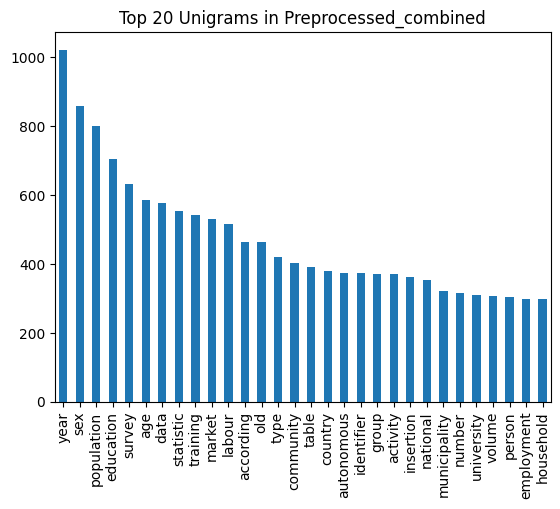

In [ ]:
Uni_gram_features.sum().sort_values(ascending=False).head(30).plot(kind='bar', title='Top 20 Unigrams in Preprocessed_combined')

In [ ]:
unigram_Accuracy=[]

*with* multioutput classifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': MultiOutputClassifier(LogisticRegression()),
    'SVM': MultiOutputClassifier(LinearSVC()),
    'MNB': MultiOutputClassifier(MultinomialNB()),
    # 'XGBoost': MultiOutputClassifier(XGBClassifier()),
    # 'Random Forest': MultiOutputClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 86.7797%
              precision    recall  f1-score   support

           0       0.40      0.94      0.56        50
           1       0.92      0.99      0.96      2174
           2       0.91      1.00      0.95      1053
           3       0.69      0.99      0.81       178
           4       0.90      0.95      0.93      1670
           5       0.79      0.97      0.87       704
           6       0.83      0.99      0.90       594
           7       0.61      1.00      0.76        97
           8       0.78      1.00      0.88       165
           9       0.87      0.99      0.93       683
          10       0.94      0.99      0.96      2287
          11       0.83      0.96      0.89      1248
          12       0.43      0.93      0.59        42

   micro avg       0.87      0.98      0.92     10945
   macro avg       0.76      0.98      0.85     10945
weighted avg       0.88      0.98      0.93     10945
 samples avg       0.89      0.90      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 91.4270%
              precision    recall  f1-score   support

           0       0.63      0.85      0.73        87
           1       0.95      0.99      0.97      2255
           2       0.95      1.00      0.97      1094
           3       0.84      0.98      0.90       222
           4       0.93      0.96      0.94      1705
           5       0.87      0.96      0.91       786
           6       0.91      0.98      0.94       651
           7       0.70      0.97      0.81       115
           8       0.88      0.97      0.93       192
           9       0.89      0.98      0.93       707
          10       0.97      0.98      0.98      2360
          11       0.91      0.96      0.93      1375
          12       0.72      0.90      0.80        72

   micro avg       0.92      0.97      0.95     11621
   macro avg       0.86      0.96      0.90     11621
weighted avg       0.93      0.97      0.95     11621
 samples avg       0.94      0.94      0.94     11621





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 76.9601%
              precision    recall  f1-score   support

           0       0.07      1.00      0.13         8
           1       0.89      0.95      0.92      2177
           2       0.85      0.99      0.92       986
           3       0.65      0.99      0.79       169
           4       0.91      0.83      0.87      1942
           5       0.73      0.91      0.81       696
           6       0.73      0.99      0.84       516
           7       0.60      1.00      0.75        95
           8       0.49      0.98      0.65       106
           9       0.79      0.99      0.88       624
          10       0.88      0.94      0.91      2262
          11       0.80      0.88      0.84      1303
          12       0.04      1.00      0.09         4

   micro avg       0.82      0.93      0.87     10888
   macro avg       0.65      0.96      0.72     10888
weighted avg       0.84      0.93      0.88     10888
 samples avg       0.84      0.83      0.83     10888





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


With OneVsRestClassifier



In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': OneVsRestClassifier(LogisticRegression()),
    'SVM': OneVsRestClassifier(LinearSVC()),
    'MNB': OneVsRestClassifier(MultinomialNB()),
   # 'XGBoost': OneVsRestClassifier(XGBClassifier()),
    #'Random Forest': OneVsRestClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 86.7797%
              precision    recall  f1-score   support

           0       0.40      0.94      0.56        50
           1       0.92      0.99      0.96      2174
           2       0.91      1.00      0.95      1053
           3       0.69      0.99      0.81       178
           4       0.90      0.95      0.93      1670
           5       0.79      0.97      0.87       704
           6       0.83      0.99      0.90       594
           7       0.61      1.00      0.76        97
           8       0.78      1.00      0.88       165
           9       0.87      0.99      0.93       683
          10       0.94      0.99      0.96      2287
          11       0.83      0.96      0.89      1248
          12       0.43      0.93      0.59        42

   micro avg       0.87      0.98      0.92     10945
   macro avg       0.76      0.98      0.85     10945
weighted avg       0.88      0.98      0.93     10945
 samples avg       0.89      0.90      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 91.4270%
              precision    recall  f1-score   support

           0       0.63      0.85      0.73        87
           1       0.95      0.99      0.97      2255
           2       0.95      1.00      0.97      1094
           3       0.84      0.98      0.90       222
           4       0.93      0.96      0.94      1705
           5       0.87      0.96      0.91       786
           6       0.91      0.98      0.94       651
           7       0.70      0.97      0.81       115
           8       0.88      0.97      0.93       192
           9       0.89      0.98      0.93       707
          10       0.97      0.98      0.98      2360
          11       0.91      0.96      0.93      1375
          12       0.72      0.90      0.80        72

   micro avg       0.92      0.97      0.95     11621
   macro avg       0.86      0.96      0.90     11621
weighted avg       0.93      0.97      0.95     11621
 samples avg       0.94      0.94      0.94     11621





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 76.9601%
              precision    recall  f1-score   support

           0       0.07      1.00      0.13         8
           1       0.89      0.95      0.92      2177
           2       0.85      0.99      0.92       986
           3       0.65      0.99      0.79       169
           4       0.91      0.83      0.87      1942
           5       0.73      0.91      0.81       696
           6       0.73      0.99      0.84       516
           7       0.60      1.00      0.75        95
           8       0.49      0.98      0.65       106
           9       0.79      0.99      0.88       624
          10       0.88      0.94      0.91      2262
          11       0.80      0.88      0.84      1303
          12       0.04      1.00      0.09         4

   micro avg       0.82      0.93      0.87     10888
   macro avg       0.65      0.96      0.72     10888
weighted avg       0.84      0.93      0.88     10888
 samples avg       0.84      0.83      0.83     10888





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 4.2.2 Machine Learning Models with Uni+Bigrams

In [ ]:
uni_bigram_Accuracy=[]

In [ ]:
# split the data using the train test split function the split ratio can be differen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
train_vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train = train_vectorizer.fit_transform(X_train)
X_test = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
Uni_Bi_gram_features = pd.DataFrame.sparse.from_spmatrix(X_train)
Uni_Bi_gram_features.columns = train_vectorizer.get_feature_names_out()

In [ ]:
len(Uni_Bi_gram_features.columns.to_list())

215844

*with* multioutput classifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': MultiOutputClassifier(LogisticRegression()),
    'SVM': MultiOutputClassifier(LinearSVC()),
    'MNB': MultiOutputClassifier(MultinomialNB()),
   # 'XGBoost': MultiOutputClassifier(XGBClassifier()),
   # 'Random Forest': MultiOutputClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 82.3619%
              precision    recall  f1-score   support

           0       0.29      0.92      0.44        37
           1       0.91      0.97      0.94      2203
           2       0.89      0.99      0.94      1032
           3       0.68      0.99      0.81       177
           4       0.90      0.93      0.92      1723
           5       0.73      0.95      0.83       661
           6       0.81      0.97      0.89       586
           7       0.59      1.00      0.74        93
           8       0.62      0.99      0.76       132
           9       0.82      0.99      0.90       647
          10       0.92      0.94      0.93      2364
          11       0.82      0.93      0.87      1273
          12       0.39      0.92      0.55        38

   micro avg       0.85      0.95      0.90     10966
   macro avg       0.72      0.96      0.81     10966
weighted avg       0.86      0.95      0.90     10966
 samples avg       0.87      0.88      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 86.3204%
              precision    recall  f1-score   support

           0       0.57      0.86      0.69        78
           1       0.95      0.97      0.96      2293
           2       0.95      0.98      0.96      1107
           3       0.83      0.96      0.89       224
           4       0.93      0.94      0.93      1755
           5       0.86      0.95      0.90       785
           6       0.88      0.96      0.92       646
           7       0.66      0.99      0.80       106
           8       0.87      0.95      0.91       194
           9       0.86      0.98      0.91       685
          10       0.94      0.92      0.93      2456
          11       0.90      0.93      0.91      1384
          12       0.72      0.82      0.77        79

   micro avg       0.91      0.95      0.93     11792
   macro avg       0.84      0.94      0.88     11792
weighted avg       0.91      0.95      0.93     11792
 samples avg       0.92      0.92      0.91     11792





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 49.7102%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.73      1.00      0.85      1721
           2       0.73      1.00      0.84       836
           3       0.53      1.00      0.69       137
           4       0.69      0.98      0.81      1244
           5       0.32      1.00      0.48       276
           6       0.07      0.96      0.12        49
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.32      1.00      0.48       249
          10       0.68      1.00      0.81      1630
          11       0.42      1.00      0.59       607
          12       0.00      0.00      0.00         0

   micro avg       0.55      1.00      0.71      6749
   macro avg       0.35      0.69      0.44      6749
weighted avg       0.64      1.00      0.77      6749
 samples avg       0.54      0.59      0.56      6749





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


with OneVsRestClassifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': OneVsRestClassifier(LogisticRegression()),
    'SVM': OneVsRestClassifier(LinearSVC()),
    'MNB': OneVsRestClassifier(MultinomialNB()),
   # 'XGBoost': OneVsRestClassifier(XGBClassifier()),
    #'Random Forest': OneVsRestClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 82.3619%
              precision    recall  f1-score   support

           0       0.29      0.92      0.44        37
           1       0.91      0.97      0.94      2203
           2       0.89      0.99      0.94      1032
           3       0.68      0.99      0.81       177
           4       0.90      0.93      0.92      1723
           5       0.73      0.95      0.83       661
           6       0.81      0.97      0.89       586
           7       0.59      1.00      0.74        93
           8       0.62      0.99      0.76       132
           9       0.82      0.99      0.90       647
          10       0.92      0.94      0.93      2364
          11       0.82      0.93      0.87      1273
          12       0.39      0.92      0.55        38

   micro avg       0.85      0.95      0.90     10966
   macro avg       0.72      0.96      0.81     10966
weighted avg       0.86      0.95      0.90     10966
 samples avg       0.87      0.88      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 86.3204%
              precision    recall  f1-score   support

           0       0.57      0.86      0.69        78
           1       0.95      0.97      0.96      2293
           2       0.95      0.98      0.96      1107
           3       0.83      0.96      0.89       224
           4       0.93      0.94      0.93      1755
           5       0.86      0.95      0.90       785
           6       0.88      0.96      0.92       646
           7       0.66      0.99      0.80       106
           8       0.87      0.95      0.91       194
           9       0.86      0.98      0.91       685
          10       0.94      0.92      0.93      2456
          11       0.90      0.93      0.91      1384
          12       0.72      0.82      0.77        79

   micro avg       0.91      0.95      0.93     11792
   macro avg       0.84      0.94      0.88     11792
weighted avg       0.91      0.95      0.93     11792
 samples avg       0.92      0.92      0.91     11792





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 49.7102%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.73      1.00      0.85      1721
           2       0.73      1.00      0.84       836
           3       0.53      1.00      0.69       137
           4       0.69      0.98      0.81      1244
           5       0.32      1.00      0.48       276
           6       0.07      0.96      0.12        49
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.32      1.00      0.48       249
          10       0.68      1.00      0.81      1630
          11       0.42      1.00      0.59       607
          12       0.00      0.00      0.00         0

   micro avg       0.55      1.00      0.71      6749
   macro avg       0.35      0.69      0.44      6749
weighted avg       0.64      1.00      0.77      6749
 samples avg       0.54      0.59      0.56      6749





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 4.2.3 Machine Learning Models with Uni+Bi+Trigrams

In [ ]:
uni_bi_trigram_Accuracy=[]

In [ ]:
# split the data using the train test split function the split ratio can be differen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
train_vectorizer = TfidfVectorizer(ngram_range=(1,3))
X_train = train_vectorizer.fit_transform(X_train)
X_test = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
Uni_Bi_gram_features = pd.DataFrame.sparse.from_spmatrix(X_train)
Uni_Bi_gram_features.columns = train_vectorizer.get_feature_names_out()

In [ ]:
len(Uni_Bi_gram_features.columns.to_list())

524646

with multioutput classifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': MultiOutputClassifier(LogisticRegression()),
    'SVM': MultiOutputClassifier(LinearSVC()),
    'MNB': MultiOutputClassifier(MultinomialNB()),
  #  'XGBoost': MultiOutputClassifier(XGBClassifier()),
  #  'Random Forest': MultiOutputClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 78.8628%
              precision    recall  f1-score   support

           0       0.26      0.94      0.41        33
           1       0.91      0.94      0.93      2254
           2       0.88      0.98      0.93      1037
           3       0.67      0.99      0.80       175
           4       0.91      0.90      0.90      1798
           5       0.73      0.95      0.82       656
           6       0.81      0.98      0.89       584
           7       0.59      1.00      0.74        93
           8       0.56      0.99      0.72       120
           9       0.82      0.99      0.89       648
          10       0.91      0.88      0.89      2475
          11       0.82      0.91      0.86      1286
          12       0.37      0.94      0.53        35

   micro avg       0.85      0.93      0.89     11194
   macro avg       0.71      0.95      0.79     11194
weighted avg       0.86      0.93      0.89     11194
 samples avg       0.86      0.86      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 80.9076%
              precision    recall  f1-score   support

           0       0.58      0.84      0.69        81
           1       0.95      0.93      0.94      2395
           2       0.95      0.95      0.95      1151
           3       0.85      0.86      0.86       254
           4       0.94      0.92      0.93      1807
           5       0.86      0.93      0.90       801
           6       0.88      0.95      0.91       657
           7       0.66      1.00      0.79       104
           8       0.86      0.94      0.90       193
           9       0.86      0.96      0.91       699
          10       0.94      0.83      0.88      2714
          11       0.90      0.90      0.90      1424
          12       0.71      0.74      0.72        87

   micro avg       0.91      0.90      0.91     12367
   macro avg       0.84      0.90      0.87     12367
weighted avg       0.91      0.90      0.91     12367
 samples avg       0.93      0.89      0.90     12367





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 44.3302%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.69      1.00      0.82      1620
           2       0.72      1.00      0.84       826
           3       0.42      1.00      0.59       108
           4       0.61      0.99      0.76      1089
           5       0.25      1.00      0.40       214
           6       0.05      0.97      0.09        34
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.27      1.00      0.43       212
          10       0.62      1.00      0.76      1488
          11       0.36      1.00      0.53       516
          12       0.00      0.00      0.00         0

   micro avg       0.50      1.00      0.66      6107
   macro avg       0.31      0.69      0.40      6107
weighted avg       0.60      1.00      0.74      6107
 samples avg       0.49      0.53      0.50      6107





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


with OneVsRestClassifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': OneVsRestClassifier(LogisticRegression()),
    'SVM': OneVsRestClassifier(LinearSVC()),
    'MNB': OneVsRestClassifier(MultinomialNB()),
#   'XGBoost': OneVsRestClassifier(XGBClassifier()),
#  'Random Forest': OneVsRestClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 78.8628%
              precision    recall  f1-score   support

           0       0.26      0.94      0.41        33
           1       0.91      0.94      0.93      2254
           2       0.88      0.98      0.93      1037
           3       0.67      0.99      0.80       175
           4       0.91      0.90      0.90      1798
           5       0.73      0.95      0.82       656
           6       0.81      0.98      0.89       584
           7       0.59      1.00      0.74        93
           8       0.56      0.99      0.72       120
           9       0.82      0.99      0.89       648
          10       0.91      0.88      0.89      2475
          11       0.82      0.91      0.86      1286
          12       0.37      0.94      0.53        35

   micro avg       0.85      0.93      0.89     11194
   macro avg       0.71      0.95      0.79     11194
weighted avg       0.86      0.93      0.89     11194
 samples avg       0.86      0.86      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 80.9076%
              precision    recall  f1-score   support

           0       0.58      0.84      0.69        81
           1       0.95      0.93      0.94      2395
           2       0.95      0.95      0.95      1151
           3       0.85      0.86      0.86       254
           4       0.94      0.92      0.93      1807
           5       0.86      0.93      0.90       801
           6       0.88      0.95      0.91       657
           7       0.66      1.00      0.79       104
           8       0.86      0.94      0.90       193
           9       0.86      0.96      0.91       699
          10       0.94      0.83      0.88      2714
          11       0.90      0.90      0.90      1424
          12       0.71      0.74      0.72        87

   micro avg       0.91      0.90      0.91     12367
   macro avg       0.84      0.90      0.87     12367
weighted avg       0.91      0.90      0.91     12367
 samples avg       0.93      0.89      0.90     12367





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 44.3302%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.69      1.00      0.82      1620
           2       0.72      1.00      0.84       826
           3       0.42      1.00      0.59       108
           4       0.61      0.99      0.76      1089
           5       0.25      1.00      0.40       214
           6       0.05      0.97      0.09        34
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.27      1.00      0.43       212
          10       0.62      1.00      0.76      1488
          11       0.36      1.00      0.53       516
          12       0.00      0.00      0.00         0

   micro avg       0.50      1.00      0.66      6107
   macro avg       0.31      0.69      0.40      6107
weighted avg       0.60      1.00      0.74      6107
 samples avg       0.49      0.53      0.50      6107





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 4.2.4 Machine Learning Models with Bi-Gram

In [ ]:
train_vectorizer = TfidfVectorizer(ngram_range=(2,2))
X_train = train_vectorizer.fit_transform(X_train)
X_test = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
bi_gram_features = pd.DataFrame.sparse.from_spmatrix(X_train)
bi_gram_features.columns = train_vectorizer.get_feature_names_out()

In [ ]:
len(bi_gram_features.columns.to_list())

202938

<Axes: title={'center': 'Top 20 Bigrams in Preprocessed_combined'}>

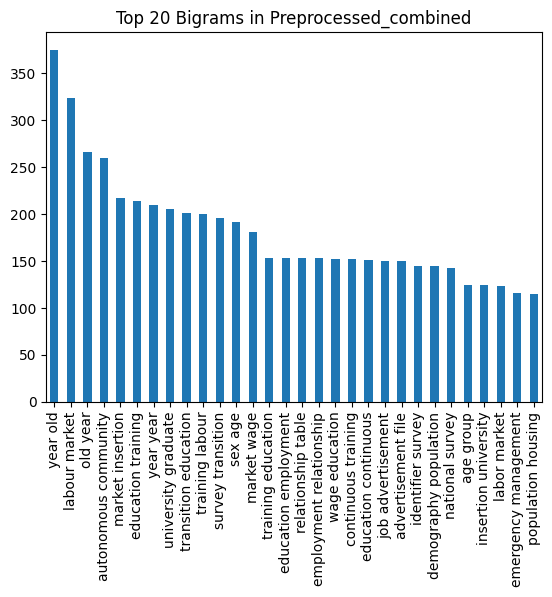

In [ ]:
bi_gram_features.sum().sort_values(ascending=False).head(30).plot(kind='bar', title='Top 20 Bigrams in Preprocessed_combined')

In [ ]:
unigram_Accuracy=[]

*with* multioutput classifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': MultiOutputClassifier(LogisticRegression()),
    'SVM': MultiOutputClassifier(LinearSVC()),
    'MNB': MultiOutputClassifier(MultinomialNB()),
    # 'XGBoost': MultiOutputClassifier(XGBClassifier()),
    # 'Random Forest': MultiOutputClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

ValueError: ignored

With OneVsRestClassifier



In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': OneVsRestClassifier(LogisticRegression()),
    'SVM': OneVsRestClassifier(LinearSVC()),
    'MNB': OneVsRestClassifier(MultinomialNB()),
   # 'XGBoost': OneVsRestClassifier(XGBClassifier()),
    #'Random Forest': OneVsRestClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 0.0000%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 0.0000%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.00         0





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 0.0000%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.00         0





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 4.2.5 Machine Learning Models with tri-Gram

In [ ]:
train_vectorizer = TfidfVectorizer(ngram_range=(3,3))
X_train = train_vectorizer.fit_transform(X_train)
X_test = TfidfVectorizer(vocabulary=train_vectorizer.vocabulary_).fit_transform(X_test)

In [ ]:
Uni_gram_features = pd.DataFrame.sparse.from_spmatrix(X_train)
Uni_gram_features.columns = train_vectorizer.get_feature_names_out()

In [ ]:
len(Uni_gram_features.columns.to_list())

308802

<Axes: title={'center': 'Top 20 Unigrams in Preprocessed_combined'}>

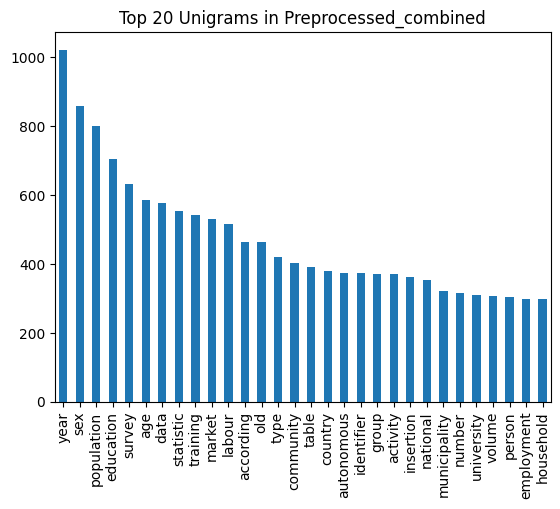

In [ ]:
Uni_gram_features.sum().sort_values(ascending=False).head(30).plot(kind='bar', title='Top 20 Unigrams in Preprocessed_combined')

In [ ]:
unigram_Accuracy=[]

*with* multioutput classifier

In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': MultiOutputClassifier(LogisticRegression()),
    'SVM': MultiOutputClassifier(LinearSVC()),
    'MNB': MultiOutputClassifier(MultinomialNB()),
    # 'XGBoost': MultiOutputClassifier(XGBClassifier()),
    # 'Random Forest': MultiOutputClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

With OneVsRestClassifier



In [ ]:
## Just for comparizon purposes other ML models are used such as GB, AB, NN, XGB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
models = {
    'Logistic regression': OneVsRestClassifier(LogisticRegression()),
    'SVM': OneVsRestClassifier(LinearSVC()),
    'MNB': OneVsRestClassifier(MultinomialNB()),
   # 'XGBoost': OneVsRestClassifier(XGBClassifier()),
    #'Random Forest': OneVsRestClassifier(RandomForestClassifier())
}

ten_models = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print(name + ' Accuracy: {:.4f}%'.format(accuracy*100))
    ten_models.append(accuracy*100)
    print(classification_report(y_pred, y_test))
    print('\n')

Logistic regression Accuracy: 86.7797%
              precision    recall  f1-score   support

           0       0.40      0.94      0.56        50
           1       0.92      0.99      0.96      2174
           2       0.91      1.00      0.95      1053
           3       0.69      0.99      0.81       178
           4       0.90      0.95      0.93      1670
           5       0.79      0.97      0.87       704
           6       0.83      0.99      0.90       594
           7       0.61      1.00      0.76        97
           8       0.78      1.00      0.88       165
           9       0.87      0.99      0.93       683
          10       0.94      0.99      0.96      2287
          11       0.83      0.96      0.89      1248
          12       0.43      0.93      0.59        42

   micro avg       0.87      0.98      0.92     10945
   macro avg       0.76      0.98      0.85     10945
weighted avg       0.88      0.98      0.93     10945
 samples avg       0.89      0.90      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 91.4270%
              precision    recall  f1-score   support

           0       0.63      0.85      0.73        87
           1       0.95      0.99      0.97      2255
           2       0.95      1.00      0.97      1094
           3       0.84      0.98      0.90       222
           4       0.93      0.96      0.94      1705
           5       0.87      0.96      0.91       786
           6       0.91      0.98      0.94       651
           7       0.70      0.97      0.81       115
           8       0.88      0.97      0.93       192
           9       0.89      0.98      0.93       707
          10       0.97      0.98      0.98      2360
          11       0.91      0.96      0.93      1375
          12       0.72      0.90      0.80        72

   micro avg       0.92      0.97      0.95     11621
   macro avg       0.86      0.96      0.90     11621
weighted avg       0.93      0.97      0.95     11621
 samples avg       0.94      0.94      0.94     11621





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MNB Accuracy: 76.9601%
              precision    recall  f1-score   support

           0       0.07      1.00      0.13         8
           1       0.89      0.95      0.92      2177
           2       0.85      0.99      0.92       986
           3       0.65      0.99      0.79       169
           4       0.91      0.83      0.87      1942
           5       0.73      0.91      0.81       696
           6       0.73      0.99      0.84       516
           7       0.60      1.00      0.75        95
           8       0.49      0.98      0.65       106
           9       0.79      0.99      0.88       624
          10       0.88      0.94      0.91      2262
          11       0.80      0.88      0.84      1303
          12       0.04      1.00      0.09         4

   micro avg       0.82      0.93      0.87     10888
   macro avg       0.65      0.96      0.72     10888
weighted avg       0.84      0.93      0.88     10888
 samples avg       0.84      0.83      0.83     10888





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
